<ul>
<li>Brief description of the data set and a summary of its attributes

<li>Initial plan for data exploration

<li>Actions taken for data cleaning and feature engineering

<li>Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

<li>Formulating at least 3 hypothesis about this data

<li>Conducting a formal significance test for one of the hypotheses and discuss the results 

<li>Suggestions for next steps in analyzing this data

<li>A paragraph that summarizes the quality of this data set and a request for additional data if needed
</ul>

I have chosen E-Commerce Shipping Data from [Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics) by PRACHI GOPALANI

#### Brief description of the data set and a summary of its attributes

##### Description
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

##### Summary of attributes

<ul>
<li>ID: ID Number of Customers.
<li>Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
<li>Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
<li>Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
<li>Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
<li>Cost of the product: Cost of the Product in US Dollars.
<li>Prior purchases: The Number of Prior Purchase.
<li>Product importance: The company has categorized the product in the various parameter such as low, medium, high.
<li>Gender: Male and Female.
<li>Discount offered: Discount offered on that specific product.
<li>Weight in gms: It is the weight in grams.
<li>Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
</ul>

### Initial plan for data exploration

In [2]:
# Data reading using pandas Library
import pandas as pd

data = pd.read_csv('ECommerce.csv')
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [4]:
data['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [5]:
data['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [6]:
data['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

<BarContainer object of 3 artists>

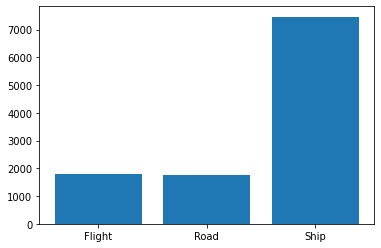

In [9]:
import matplotlib.pyplot as plt

plot = data.groupby(['Mode_of_Shipment']).agg({'ID' :'count'})


plt.bar(plot.index.values, plot['ID'])


<BarContainer object of 3 artists>

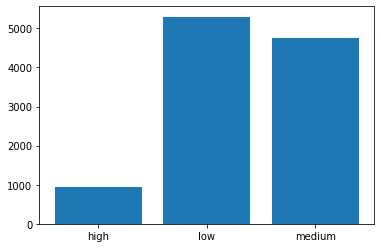

In [10]:
plot = data.groupby(['Product_importance']).agg({'ID' :'count'})


plt.bar(plot.index.values, plot['ID'])

([<matplotlib.patches.Wedge at 0x27ac1e1bb70>,
 [Text(-0.01429514880238828, 1.0999071091327293, 'F'),
  Text(0.014295148802387655, -1.0999071091327293, 'M')])

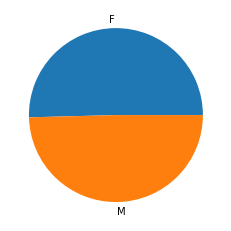

In [13]:
plot = data.groupby(['Gender']).agg({'ID' :'count'})
plt.pie(plot['ID'], labels=plot.index.values)

### Actions taken for data cleaning and feature engineering

In [16]:
data_cleaning = data[['Warehouse_block','Product_importance','Mode_of_Shipment', 'Gender']]
data_cleaning

,Warehouse_block,Product_importance,Mode_of_Shipment,Gender
0,D,low,Flight,F
1,F,low,Flight,M
2,A,low,Flight,M
3,B,medium,Flight,M
4,C,medium,Flight,F
...,...,...,...,...
10994,A,medium,Ship,F
10995,B,medium,Ship,F
10996,C,low,Ship,F
10997,F,medium,Ship,M


In [18]:
data_cleaning.isnull().sum()

Warehouse_block       0
Product_importance    0
Mode_of_Shipment      0
Gender                0
dtype: int64

In [22]:
# One Hot Encoding
one_hot_encoding = pd.get_dummies(data_cleaning.columns)
one_hot_encoding

,Gender,Mode_of_Shipment,Product_importance,Warehouse_block
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0


### Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
<ul>
<li>Preferred Mode_of_Shipment is by ships
<li>The count of products having Product_importance as high is more than the count of products having Product_importance as low.
<li>The count of products having Discount_offered as high is more than the count of products having Discount_offered as low.
<li>The count of products having Weight_in_gms as high is more than the count of products having Weight_in_gms as low.
<li>The count of products having Reached_on_time as high is more than the count of products having Reached_on_time as low.
<li>The count of products having Customer_care_calls as high is more than the count of products having Customer_care_calls as low.
<li>The count of products having Customer_rating as high is more than the count of products having Customer_rating as low.
<li>The count of products having Cost_of_the_product as high is more than the count of products having Cost_of_the_product as low.
<li>The count of products having Prior_purchases as high is more than the count of products having Prior_purchases as low.
<li>Males and females have ordered products equally
</ul>

### Formulating at least 3 hypothesis about this data
<ul>
<li>Products having high importance have shipping mode as flight
<li>Customer ratings are higher for products delivered on or before time
<li>Products having high weight have shipping mode as Ship

### Conducting a formal significance test for one of the hypotheses and discuss the results

Null Hypothesis : Preferred mode of shipping is by Ships

Alternative Hypothesis : Preferred mode of shipping is not by Ships

In [39]:
from scipy.stats import binom
ship_mode = data[data['Mode_of_Shipment'].str.contains('Ship')].shape[0]
total_counts = data.shape[0]

ship_mode

7462

In [38]:
print(binom.ppf(0.95,total_counts,0.5)+1)

5587.0


Which means, data should have more than 5587 ship as mode of shipping or more to be considered preferred. Then we will say the Preferred mode od shipping is by Ships with a confidence level of 95%.

Since the number of ship is more than 5587, we can say that Preferred mode of shipping is by Ships and accept null hypothesis and reject alternative hypothesis.


### Suggestions for next steps in analyzing this data

Next steps could include:
<ul> 
<li>Exploring the data using different visualization techniques to determine the places where the mode of shipping is by ship, flight or other means and the reasons for that



### A paragraph that summarizes the quality of this data set and a request for additional data if needed

<li>The data needs to be expanded to include timestamps to do timeseries analysis.
<li>The data can also include geographic information to do analysis on modes of shipping by location.
